In [1]:
from pulser import Pulse, Sequence, Register
from pulser_simulation import Simulation
from pulser.devices import Chadoq2
from pulser.waveforms import InterpolatedWaveform
import matplotlib.pyplot as plt
import numpy as np

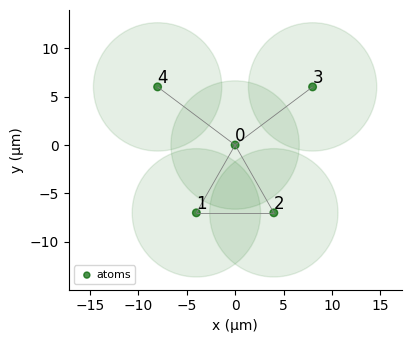

In [3]:
qubits = {'0': (0,0), '1': (-4,-7), '2': (4, -7), '3': (8,6), '4': (-8, 6)}
reg = Register(qubits)
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True
)

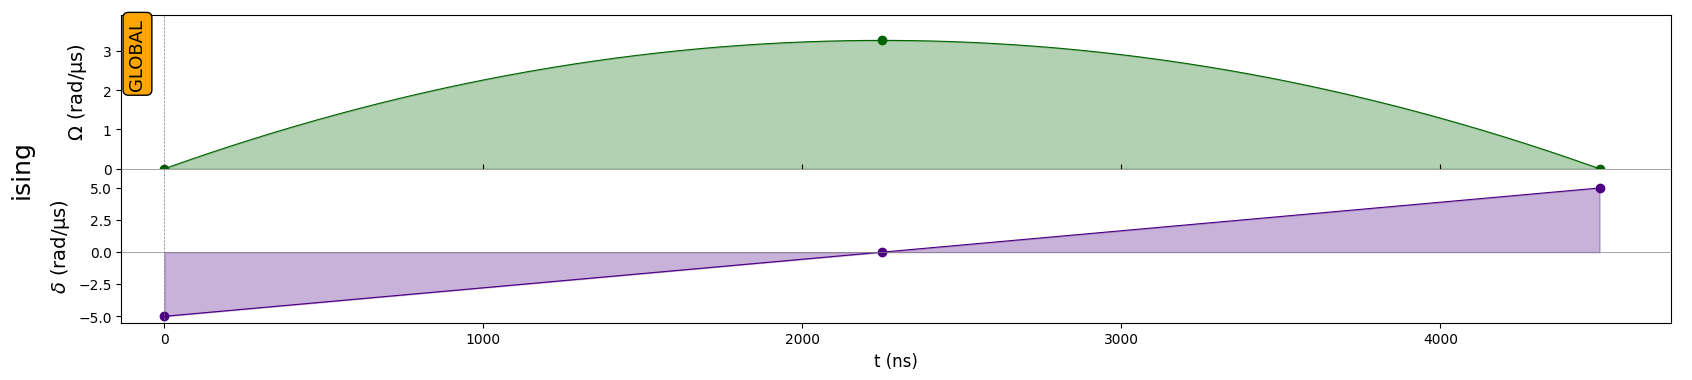

In [4]:
link_max = 10 # Maximum distances between connect nodes (distance betweeen qubit 0 and 4 or 0 and 3)
no_link_min = 13  # Minimal distance between atom that are not connected (distance between atom 2 and 3)

Omega_min = Chadoq2.interaction_coeff / no_link_min**6
Omega_max = Chadoq2.interaction_coeff / link_max**6

Omega = (Omega_min + Omega_max) / 2

delta_0 = -5
delta_f = -delta_0

T = 4500

adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)

seq = Sequence(reg, Chadoq2)
seq.declare_channel('ising', 'rydberg_global')
seq.add(adiabatic_pulse, 'ising')

seq.draw()

In [5]:
simul = Simulation(seq)
results = simul.run()
count_dict = results.sample_final_state(N_samples = 10000)
count_dict

/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser_simulation/simulation.py:1200: DeprecationWarning: The `Simulation` class is deprecated, use `QutipEmulator.from_sequence` instead.
  warnings.warn(


Counter({'00001': 16,
         '00010': 5,
         '00011': 639,
         '00100': 3,
         '00101': 173,
         '00110': 95,
         '00111': 4337,
         '01000': 2,
         '01001': 90,
         '01010': 176,
         '01011': 4355,
         '10000': 82,
         '10001': 9,
         '10010': 17,
         '10011': 1})

In [6]:
def plot_distribution(C):
  C = dict(sorted(C.items(), key = lambda item: item[1], reverse = True))
  indexes = ['01011', '00111']
  color_dict = {key: 'r' if key in indexes else 'g' for key in C}
  plt.figure(figsize= (12,6))
  plt.xlabel('bitstings')
  plt.ylabel('counts')
  plt.bar(C.keys(), C.values(), width = 0.5, color = color_dict.values())
  plt.xticks(rotation = 'vertical')
  plt.show()

/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser_simulation/simulation.py:1200: DeprecationWarning: The `Simulation` class is deprecated, use `QutipEmulator.from_sequence` instead.
  warnings.warn(
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser_simulation/simulation.py:1200: DeprecationWarning: The `Simulation` class is deprecated, use `QutipEmulator.from_sequence` instead.
  warnings.warn(
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser_simulation/simulation.py:1200: DeprecationWarning: The `Simulation` class is deprecated, use `QutipEmulator.from_sequence` instead.
  warnings.warn(
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser_simulation/simulation.py:1200: DeprecationWarning: The `Simulation` class is deprecated, use `QutipEmulator.from_sequence` instead.
  warnings.warn(
/home/onofre/anaconda3/envs/pasqal_molecular/lib/python3.8/site-packages/pulser_simu

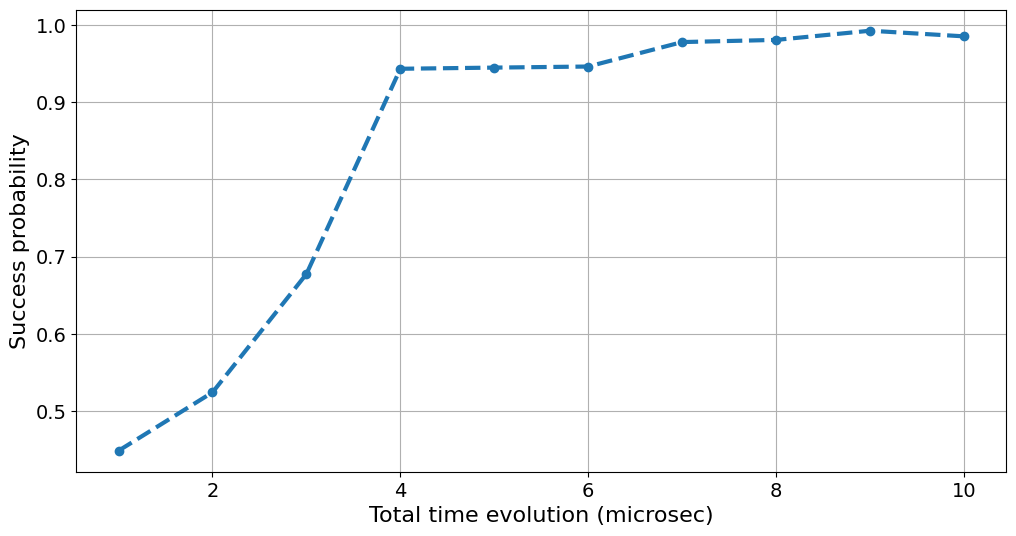

In [7]:
success_probability = []

for T in 1000 * np.linspace(1, 10, 10):
  adiabatic_pulse = Pulse(
     InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
     InterpolatedWaveform(T, [delta_0, 0, delta_f]),
     0,
  )

  seq = Sequence(reg, Chadoq2)
  seq.declare_channel('ising', 'rydberg_global')
  seq.add(adiabatic_pulse, 'ising')

  simul = Simulation(seq)
  results = simul.run()
  count_dict = results.sample_final_state(N_samples = 10000)
  success_probability.append((count_dict['01011'] + count_dict['00111'])/10000)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), np.array(success_probability), '--o',linewidth = 3 )
plt.xlabel('Total time evolution (microsec)', fontsize = 16)
plt.ylabel('Success probability', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()
